In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# declare vars
sample_num_ok = 900
sample_num_ng = 100
sample_num = sample_num_ok + sample_num_ng

In [3]:
# declare functions
def boxplot(ok, ng, col):
    points = (ok, ng)
    fig, ax = plt.subplots()
    bp = ax.boxplot(points)
    ax.set_xticklabels(['ok', 'ng'])
    plt.title('box plot')
    plt.xlabel('target')
    plt.ylabel(col)
    plt.grid()
    plt.show()
    
def histogram_dbl(x, y, col):
    x_weights, y_weights = np.ones_like(x) / len(x), np.ones_like(y) / len(y)
    plt.figure(figsize=(6.0, 4.0))
    plt.hist([x, y], weights=[x_weights, y_weights], bins=50, alpha=0.3, histtype='stepfilled', color=['r', 'b'])
    plt.title('histogram')
    plt.xlabel(col)
    plt.ylabel('probability')
    plt.show()

In [4]:
# create dummy dataset
## declare data frame
columns = ['target', 'param1', 'param2', 'param3']
df = pd.DataFrame(columns=columns)

## declare arrays
target = np.concatenate([np.ones(sample_num_ok), np.zeros(sample_num_ng)], 0) # 1 for OK, 0 for NG
param1 = np.random.normal(loc=0, scale=1, size=sample_num)
param2 = np.concatenate([np.random.normal(loc=2.5, scale=1, size=sample_num_ok), np.random.normal(loc=1, scale=1, size=sample_num_ng)], 0)
param3 = np.random.normal(loc=1, scale=1, size=sample_num)

## store data
df.target = target
df.param1 = param1
df.param2 = param2
df.param3 = param3

In [5]:
# display data
df.head(n=5)

,target,param1,param2,param3
0,1.0,-0.789814,1.776820,2.361048
1,1.0,0.755615,2.478873,1.101054
2,1.0,-1.560904,3.663526,2.072926
3,1.0,0.463431,2.721388,-0.353053
4,1.0,0.312845,3.683818,-0.237630


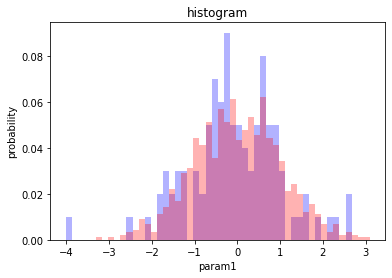

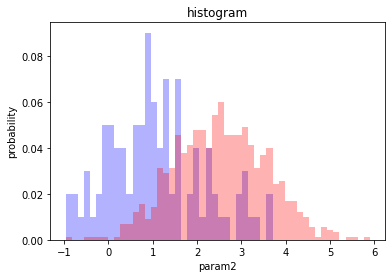

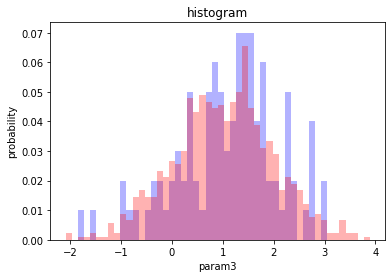

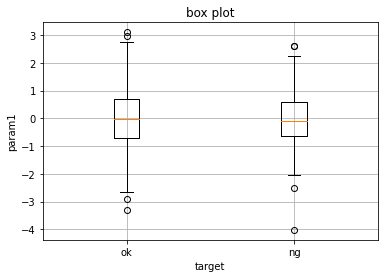

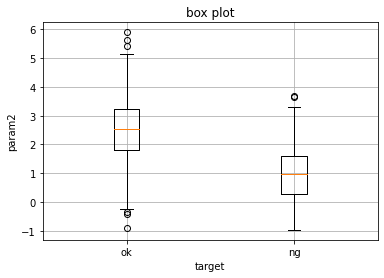

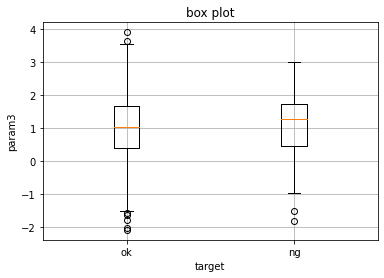

In [6]:
# 1D visualization
df_ok = df[df.target == 1]
df_ng = df[df.target == 0]

## histogram
for col in columns[1:len(columns)]:
    ok, ng = df_ok[col], df_ng[col]
    histogram_dbl(ok, ng, col)

## boxplot
for col in columns[1:len(columns)]:
    ok, ng = df_ok[col], df_ng[col]
    boxplot(ok, ng, col)
    
# 2D visualization
## heatmap


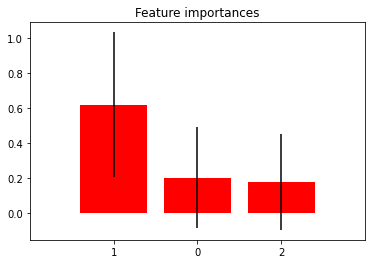

In [10]:
# machine learning
from sklearn.ensemble import RandomForestClassifier

## prepare dataset
X, y = df[columns[1:len(columns)]], df.target

## modeling
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

## calculate & visualize importances
importances = clf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()